# Importing the packages

In [44]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.multivariate.manova import MANOVA
import seaborn as sns
import statsmodels.api as sm
from seaborn_qqplot import pplot
import math

# Pre-analysis
## Basic variables

In [45]:
mediapipe1Dir = "../datasets/mediapipe_rectangle.csv"
haar1Dir = "../datasets/haar_rectangle.csv"
mtcnn1Dir = "../datasets/mtcnn_rectangle.csv"

dependant = ["total_avg_displacement_x_abs", "total_avg_displacement_y_abs", "total_avg_displacement_y", "total_avg_displacement_x","fps", "frames_with_no_detection", "area_bb"]
plot_vars = dependant

type_dict = {"fps": float, "frames_with_no_detection": float, "area_bb":float, "total_avg_displacement_x":float, "total_avg_displacement_y":float, "total_avg_displacement_x_abs":float, "total_avg_displacement_y_abs":float}

method_dict = {0: "mediapipe", 1: "haar", 2: "mtcnn"}

exp_dict = {0: "rectangular", 1: ""}

alpha = 0.01

## Reading the datasets

In [46]:
mediapipe1 = pd.read_csv(mediapipe1Dir)
mediapipe1["method"] = ["mediapipe" for i in range(0,mediapipe1.shape[0])]
haar1 = pd.read_csv(haar1Dir)
haar1["method"] = ["haar" for i in range(0,haar1.shape[0])]
mtcnn1 = pd.read_csv(mtcnn1Dir)
mtcnn1["method"] = ["mtcnn" for i in range(0,mtcnn1.shape[0])]

experiment1 = pd.concat([mediapipe1, haar1, mtcnn1])

exp_list = [experiment1]

## Take out repeated indexes
for i in range(0, len(exp_list)):
    indexes = [i for i in range(0, exp_list[0].shape[0])]
    exp_list[0].index = indexes

## Asociate adequate type
for i in range(0,len(exp_list)):
    exp_list[i] = exp_list[i].astype(type_dict)
    exp_list[i] = exp_list[i].dropna(0)

/home/pablo/vEnv/ai3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only


# Initial analysis

## Descriptive statistics

In [47]:
for i in range(0,len(exp_list)):
    print(exp_list[i].describe())

              fps  frames_with_no_detection       area_bb  \
count   76.000000                 76.000000     76.000000   
mean    45.869930                  0.750000   7892.134521   
std     40.691881                  2.389561   2032.864100   
min      9.393969                  0.000000   4924.966330   
25%     14.165883                  0.000000   5224.673140   
50%     25.148896                  0.000000   8480.092267   
75%     81.862491                  0.000000   9837.657595   
max    190.841023                 11.000000  10315.378549   

       total_avg_displacement_x  total_avg_displacement_y  \
count                 76.000000                 76.000000   
mean                  -0.167661                  0.019324   
std                    1.134810                  0.152707   
min                   -5.264563                 -0.308271   
25%                   -0.511808                 -0.060745   
50%                   -0.052246                  0.004419   
75%                    

## Scatter matrix

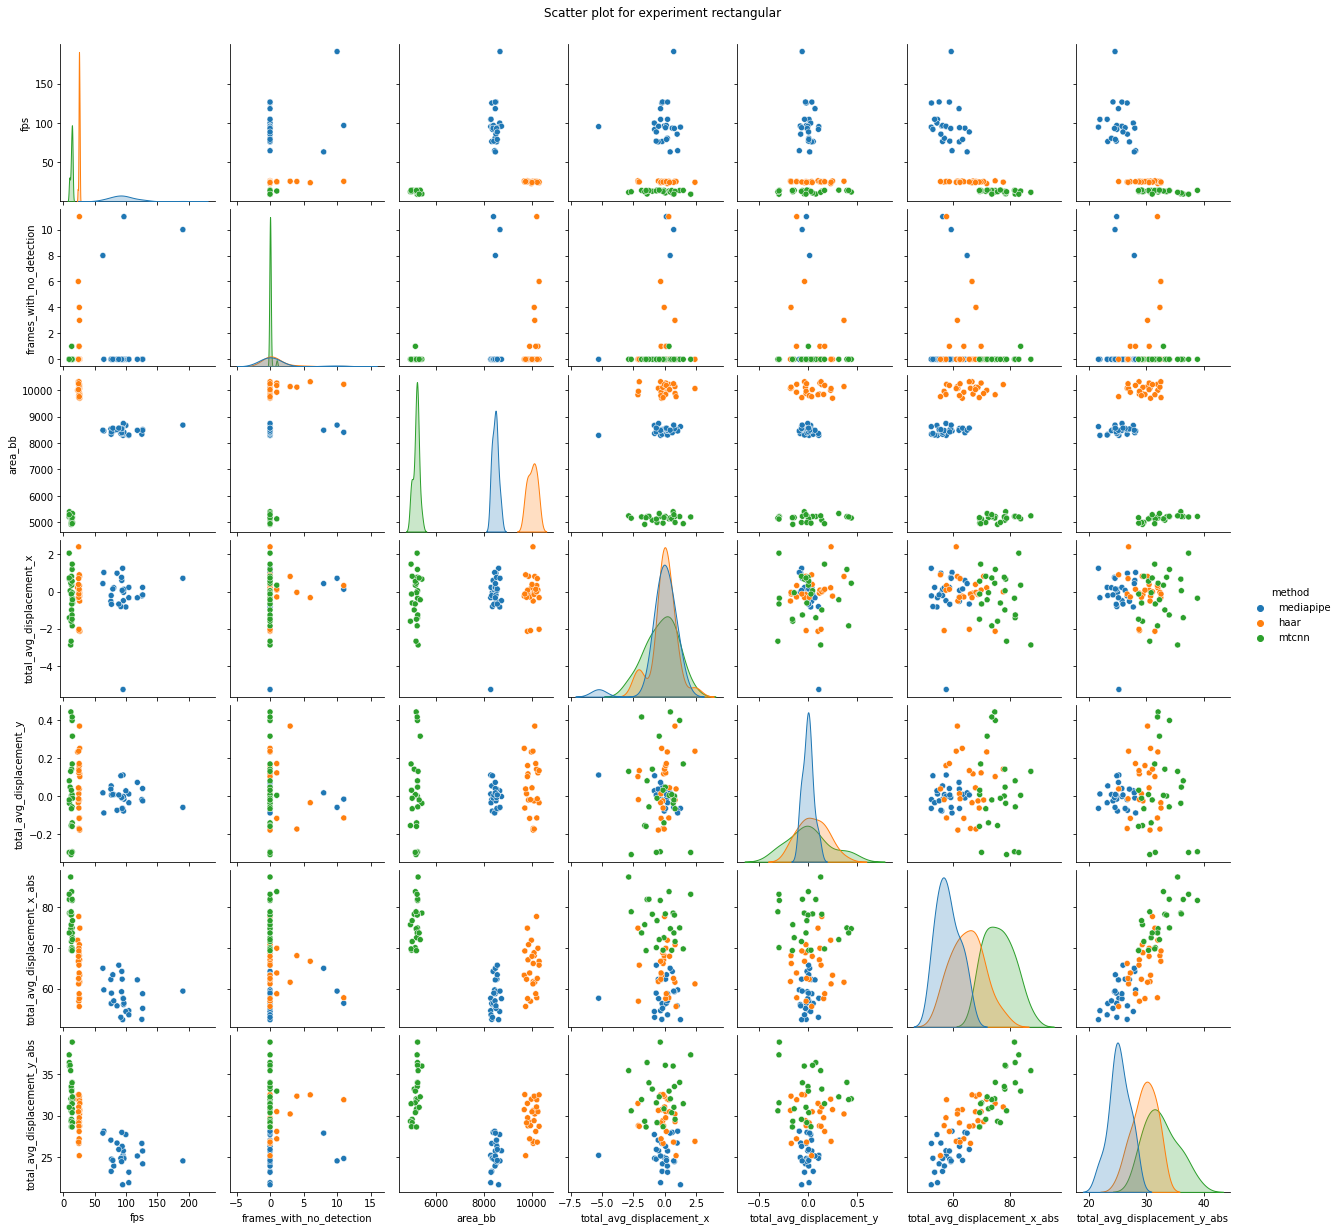

In [48]:
for i in range(0, len(exp_list)):
    scatter = sns.pairplot(exp_list[i], hue="method")
    scatter.fig.suptitle(f"Scatter plot for experiment {exp_dict[i]}")
    scatter.fig.subplots_adjust(top=0.95)

    scatter.savefig(f"scatter_{exp_dict[i]}.png", dpi=200)

## Normality check
### Shapiro-Wilkinson test

A Shapiro-Wilkinson test is performed to check the normality of the sample obtained

In [49]:
for i in range(0, len(exp_list)):
    for j in range(0, 3):
        method = exp_list[i].loc[exp_list[i]["method"] == method_dict[j],dependant]
        #print(method)
        print(f" - Results of the Shapiro-Wilkinson test for the experiment {exp_dict[i]} with the method {method_dict[j]}: \n            {stats.shapiro(method)}")


 - Results of the Shapiro-Wilkinson test for the experiment rectangular with the method mediapipe: 
            ShapiroResult(statistic=0.4281405806541443, pvalue=8.108098555035191e-24)
 - Results of the Shapiro-Wilkinson test for the experiment rectangular with the method haar: 
            ShapiroResult(statistic=0.42444074153900146, pvalue=1.865467029774802e-23)
 - Results of the Shapiro-Wilkinson test for the experiment rectangular with the method mtcnn: 
            ShapiroResult(statistic=0.4310225248336792, pvalue=2.4260438952549744e-23)


### Shapiro-Wilkinson test for each variable

In [50]:
for i in range(0, len(exp_list)):
    print(f"***************************** Experiment {i}")
    for j in range(0, 3):
        print(f" ------ Next method: {method_dict[j]}")
        for var in dependant:
            method = exp_list[i].loc[exp_list[i]["method"] == method_dict[j],var]
            #print(method)
            print(f" - Results of the Shapiro-Wilkinson test for the experiment {exp_dict[i]} with the method {method_dict[j]} for the variable {var}: \n            {stats.shapiro(method)}")


***************************** Experiment 0
 ------ Next method: mediapipe
 - Results of the Shapiro-Wilkinson test for the experiment rectangular with the method mediapipe for the variable total_avg_displacement_x_abs: 
            ShapiroResult(statistic=0.9536030292510986, pvalue=0.28117749094963074)
 - Results of the Shapiro-Wilkinson test for the experiment rectangular with the method mediapipe for the variable total_avg_displacement_y_abs: 
            ShapiroResult(statistic=0.9665387272834778, pvalue=0.5360379815101624)
 - Results of the Shapiro-Wilkinson test for the experiment rectangular with the method mediapipe for the variable total_avg_displacement_y: 
            ShapiroResult(statistic=0.9624994993209839, pvalue=0.44310855865478516)
 - Results of the Shapiro-Wilkinson test for the experiment rectangular with the method mediapipe for the variable total_avg_displacement_x: 
            ShapiroResult(statistic=0.6733888983726501, pvalue=2.340065975658945e-06)
 - Results of

### QQ-plot

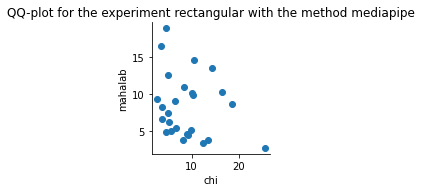

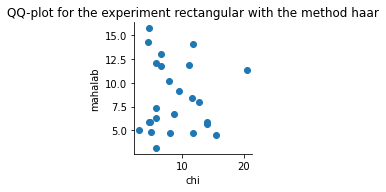

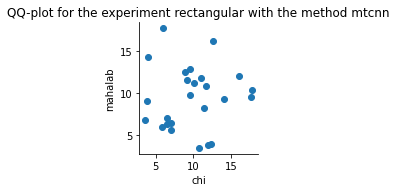

In [51]:
for i in range(0, len(exp_list)):
    m1 = exp_list[i].loc[exp_list[i]["method"] == method_dict[0],dependant]
    cov1 = np.cov(m1.T)
    icov1 = np.linalg.inv(cov1)
    left_term1 = np.dot((m1 - np.mean(m1)),icov1)
    total1 = np.dot(left_term1, (m1 - np.mean(m1)).T)
    mahalab1 = np.diag(total1)
    chi1 = np.random.chisquare(9,  m1.shape[0])
    data1 = pd.DataFrame({"mahalab": mahalab1, "chi": chi1} )
    scatt1 = pplot(x="chi", data=data1, y="mahalab")
    scatt1.set(title=f"QQ-plot for the experiment {exp_dict[i]} with the method {method_dict[0]}")
    scatt1.savefig(f"qqplot_exp{i}_m1.png", dpi=300)

    m2 = exp_list[i].loc[exp_list[i]["method"] == method_dict[1],dependant]
    cov2 = np.cov(m2.T)
    icov2 = np.linalg.inv(cov2)
    left_term2 = np.dot((m2 - np.mean(m2)),icov2)
    total2 = np.dot(left_term2, (m2 - np.mean(m2)).T)
    mahalab2 = np.diag(total2)
    chi2 = np.random.chisquare(9,  m2.shape[0])
    data2 = pd.DataFrame({"mahalab": mahalab2, "chi": chi2} )
    scatt2 = pplot(x="chi", data=data2, y="mahalab")
    scatt2.set(title=f"QQ-plot for the experiment {exp_dict[i]} with the method {method_dict[1]}")
    scatt2.savefig(f"qqplot_exp{i}_m2.png", dpi=300)

    m3 = exp_list[i].loc[exp_list[i]["method"] == method_dict[2],dependant]
    cov3 = np.cov(m3.T)
    icov3 = np.linalg.inv(cov3)
    left_term3 = np.dot((m3 - np.mean(m3)),icov3)
    total3 = np.dot(left_term3, (m3 - np.mean(m3)).T)
    mahalab3 = np.diag(total3)
    chi3 = np.random.chisquare(9,  m3.shape[0])
    data3 = pd.DataFrame({"mahalab": mahalab3, "chi": chi3} )
    scatt3 = pplot(x="chi", data=data3, y="mahalab")
    scatt3.set(title=f"QQ-plot for the experiment {exp_dict[i]} with the method {method_dict[2]}")
    scatt3.savefig(f"qqplot_exp{i}_m3.png", dpi=300)

### QQ plot for individual variables

/home/pablo/vEnv/ai3/lib/python3.7/site-packages/seaborn/axisgrid.py:1242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


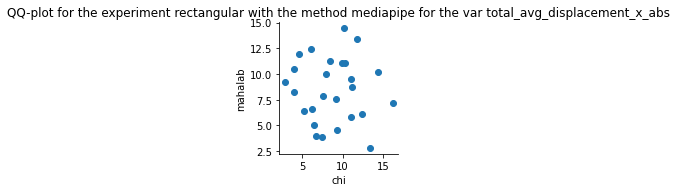

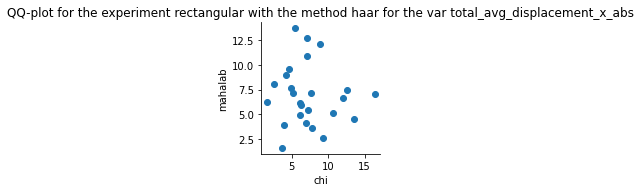

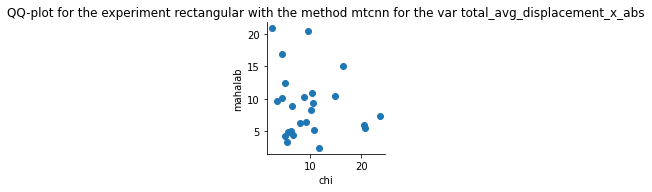

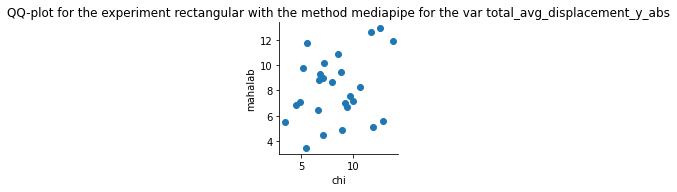

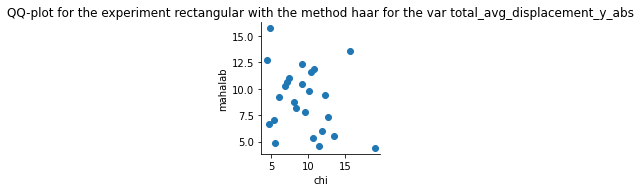

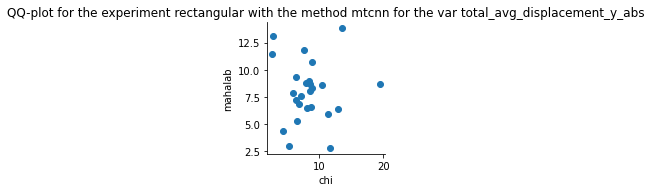

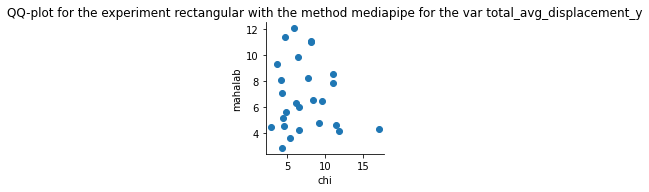

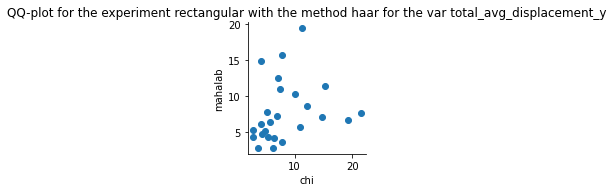

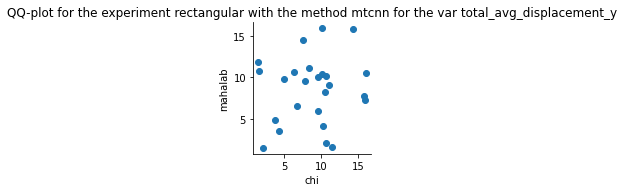

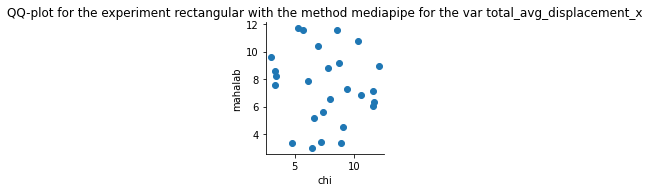

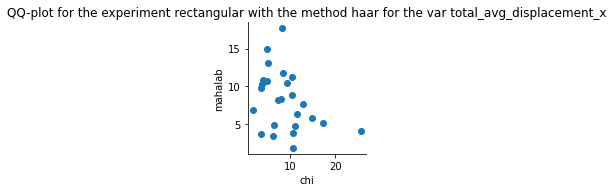

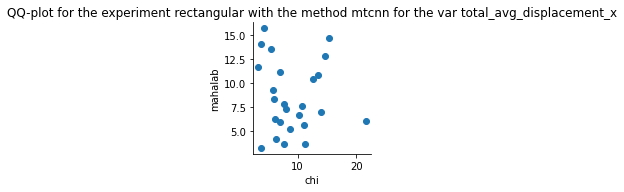

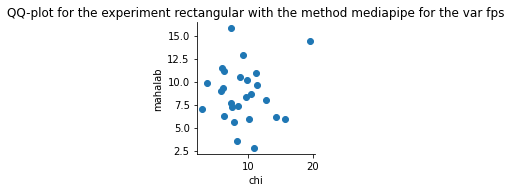

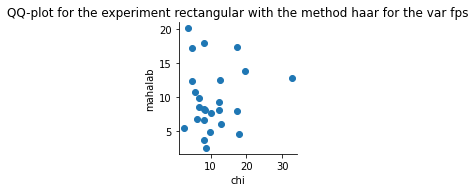

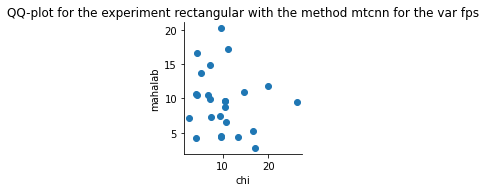

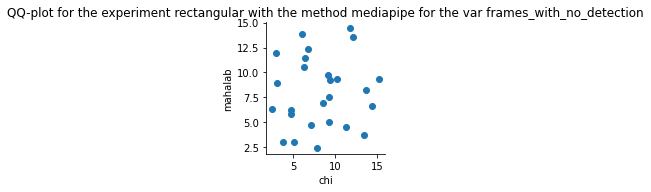

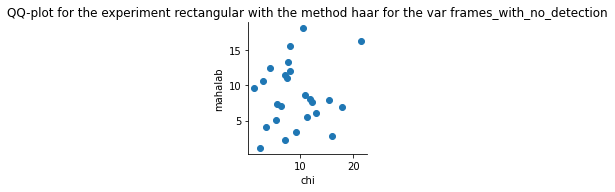

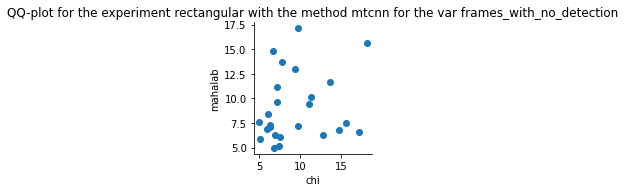

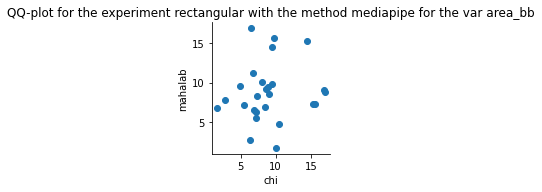

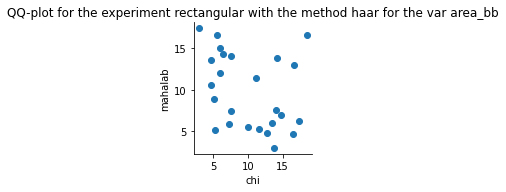

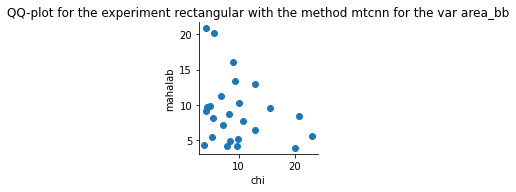

In [52]:
for i in range(0, len(exp_list)):
    for var in dependant:
        m1 = exp_list[i].loc[exp_list[i]["method"] == method_dict[0],var]
        cov1 = np.cov(m1)
        icov1 = 1/cov1
        left_term1 = np.dot((m1 - np.mean(m1)),icov1)
        mahalab1 = np.dot(left_term1, (m1 - np.mean(m1)))
        chi1 = np.random.chisquare(9,  m1.shape[0])
        data1 = pd.DataFrame({"mahalab": mahalab1, "chi": chi1} )
        scatt1 = pplot(x="chi", data=data1, y="mahalab")
        scatt1.set(title=f"QQ-plot for the experiment {exp_dict[i]} with the method {method_dict[0]} for the var {var}")
        scatt1.savefig(f"qqplot_exp{i}_m1_{var}.png", dpi=300)

        m2 = exp_list[i].loc[exp_list[i]["method"] == method_dict[1],var]
        cov2 = np.cov(m2)
        icov2 = 1/cov2
        left_term2 = np.dot((m2 - np.mean(m2)),icov2)
        mahalab2 = np.dot(left_term2, (m2 - np.mean(m2)))
        chi2 = np.random.chisquare(9,  m2.shape[0])
        data2 = pd.DataFrame({"mahalab": mahalab2, "chi": chi2} )
        scatt2 = pplot(x="chi", data=data2, y="mahalab")
        scatt2.set(title=f"QQ-plot for the experiment {exp_dict[i]} with the method {method_dict[1]} for the var {var}")
        scatt2.savefig(f"qqplot_exp{i}_m2_{var}.png", dpi=300)

        m3 = exp_list[i].loc[exp_list[i]["method"] == method_dict[2],var]
        cov3 = np.cov(m3)
        icov3 = 1/cov3
        left_term3 = np.dot((m3 - np.mean(m3)),icov3)
        mahalab3 = np.dot(left_term3, (m3 - np.mean(m3)))
        chi3 = np.random.chisquare(9,  m3.shape[0])
        data3 = pd.DataFrame({"mahalab": mahalab3, "chi": chi3} )
        scatt3 = pplot(x="chi", data=data3, y="mahalab")
        scatt3.set(title=f"QQ-plot for the experiment {exp_dict[i]} with the method {method_dict[2]} for the var {var}")
        scatt3.savefig(f"qqplot_exp{i}_m3_{var}.png", dpi=300)

## Tests
### MANOVA
Performing MANOVA test

### Performing a Barttlet test between both populations

#### With a Barttlet test we can check whether the covariances can be considered equal. In case they can be considered equal, a test will be performed to check whether the mean can also be considered equal or not in the case of equal covariances. Elsewhere, the test will be performed for the case of unequal covariances matrices.

In [53]:
for i in range(0, len(exp_list)):
    ####################################################################################################
    ## Declare the datasets for each method
    m1 = exp_list[i].loc[exp_list[i]["method"] == method_dict[0],dependant]
    m1 = exp_list[i].loc[exp_list[i]["method"] == method_dict[1],dependant]
    m1 = exp_list[i].loc[exp_list[i]["method"] == method_dict[2],dependant]

    ####################################################################################################
    ## Obtain covariance and other relevant variables
    cov1 = np.cov(m1.T)
    cov2 = np.cov(m2.T)
    cov3 = np.cov(m3.T)

    n1 = m1.shape[0]
    n2 = m2.shape[0]
    n3 = m3.shape[0]
    p = cov1.shape[0]

    Sp12 = ((n1 - 1)*cov1 + (n2 - 1)*cov2)/(n1 + n2 - 2)
    Sp13 = ((n1 - 1)*cov1 + (n3 - 1)*cov3)/(n1 + n3 - 2)
    Sp23 = ((n3 - 1)*cov3 + (n2 - 1)*cov2)/(n3 + n2 - 2)

    equalCov12 = False
    equalCov13 = False
    equalCov23 = False

    ####################################################################################################
    ## Barttlet test
    c12 = 1 - ((2*p^2 + 3*p - 1)/(6*(p + 1))) * ((1/(n1-1)) + (1/(n1-1)) - (1/(n1+n2-1)))
    L12 = c12 * ((n1 + n2 - 2)*np.log(np.linalg.det(Sp12)) - (n1-1)*np.log(np.linalg.det(cov1)) - (n2-1)*np.log(np.linalg.det(cov2)))
    c23 = 1 - ((2*p^2 + 3*p - 1)/(6*(p + 1))) * ((1/(n2-1)) + (1/(n3-1)) - (1/(n3+n2-1)))
    L23 = c23 * ((n2 + n3 - 2)*np.log(np.linalg.det(Sp23)) - (n2-1)*np.log(np.linalg.det(cov2)) - (n3-1)*np.log(np.linalg.det(cov3)))
    c13 = 1 - ((2*p^2 + 3*p - 1)/(6*(p + 1))) * ((1/(n1-1)) + (1/(n3-1)) - (1/(n1+n3-1)))
    L13 = c13 * ((n1 + n3 - 2)*np.log(np.linalg.det(Sp13)) - (n1-1)*np.log(np.linalg.det(cov1)) - (n3-1)*np.log(np.linalg.det(cov3)))
    critical = stats.chi2(df=p*(p+1)/2).ppf(alpha)

    ####################################################################################################
    ## Printing the results
    if (L12 > critical):
        print(f"Rejecting H0 when comparing the methods 1 and 2.")
        equalCov12 = True
    else:
        print(f"Accepting H0 when comparing the methods 1 and 2.")

    if (L23 > critical):
        print(f"Rejecting H0 when comparing the methods 2 and 3.")
        equalCov23 = True
    else:
        print(f"Accepting H0 when comparing the methods 2 and 3.")

    if (L13 > critical):
        print(f"Rejecting H0 when comparing the methods 1 and 3.")
        equalCov13 = True
    else:
        print(f"Accepting H0 when comparing the methods 1 and 3.")
    ####################################################################################################
    ## Check for equal mean vector
    T12_sqr = 0
    T13_sqr = 0
    T23_sqr = 0
    f_dist = stats.f

    ############################################################################
    ## Equal Mean 1-2
    if (equalCov12):
        left_term = np.dot((np.mean(m1) - np.mean(m2)).T,np.linalg.inv(((1/n1)+ (1/n2))*Sp12))
        T12 = np.dot(left_term, (np.mean(m1) - np.mean(m2)).T)
        critical = stats.f.ppf(alpha, p, n1 + n2 - p - 1)
        T12 = math.sqrt(T12)
        critical = c12*critical
        if T12 > critical:
            print(f"Rejecting H0: means cannot be considered equal for m1 and m2")
        else:
            print(f"Aceepting H0: means can be considered equal for m1 and m2")
    else:
        left_term = np.dot((np.mean(m1) - np.mean(m2)),np.linalg.inv((cov1/n1)+ (cov2/n2)))
        T12 = np.dot(left_term, (np.mean(m1) - np.mean(m2)).T)
        T12 = (np.mean(m1) - np.mean(m2)) * np.linalg.inv((cov1/n1).T + (cov2/n2).T) * (np.mean(m1) - np.mean(m2)).T
        critical = stats.chi2(df=p*(p+1)/2).ppf(alpha)
        T12 = T12^(1/2)
        critical = c12*critical
        if T12 > critical:
            print(f"Rejecting H0: means cannot be considered equal for m1 and m2")
        else:
            print(f"Aceepting H0: means can be considered equal for m1 and m2")
    
    ############################################################################
    ## Equal Mean 2-3
    if (equalCov23):
        left_term = np.dot((np.mean(m2) - np.mean(m3)).T,np.linalg.inv(((1/n2)+ (1/n3))*Sp23))
        T23 = np.dot(left_term, (np.mean(m2) - np.mean(m3)).T)
        critical = stats.f.ppf(alpha, p, n1 + n3 - p - 1)
        T23 = math.sqrt(T23)
        critical = c23*critical
        if T23 > critical:
            print(f"Rejecting H0: means cannot be considered equal for m2 and m3")
        else:
            print(f"Aceepting H0: means can be considered equal for m2 and m3")
    else:
        left_term = np.dot((np.mean(m2) - np.mean(m3)),np.linalg.inv((cov2/n2)+ (cov3/n3)))
        T23 = np.dot(left_term, (np.mean(m2) - np.mean(m3)).T)
        critical = stats.chi2(df=p*(p+1)/2).ppf(alpha)
        T23 = math.sqrt(T23)
        critical = c23*critical
        if T23 > critical:
            print(f"Rejecting H0: means cannot be considered equal for m2 and m3")
        else:
            print(f"Aceepting H0: means can be considered equal for m2 and m3")

    ############################################################################
    ## Equal Mean 1-3
    if (equalCov13):
        left_term = np.dot((np.mean(m1) - np.mean(m3)).T,np.linalg.inv(((1/n1)+ (1/n3))*Sp13))
        T13 = np.dot(left_term, (np.mean(m1) - np.mean(m3)).T)
        critical = stats.f.ppf(alpha, p, n1 + n3 - p - 1)
        T13 = math.sqrt(T13)
        critical = c13*critical
        if T13 > critical:
            print(f"Rejecting H0: means cannot be considered equal for m1 and m3")
        else:
            print(f"Aceepting H0: means can be considered equal for m1 and m3")
    else:
        left_term = np.dot((np.mean(m1) - np.mean(m3)),np.linalg.inv((cov1/n1)+ (cov3/n3)))
        T13 = np.dot(left_term, (np.mean(m1) - np.mean(m3)).T)
        critical = stats.chi2(df=p*(p+1)/2).ppf(alpha)
        T13 = math.sqrt(T13)
        critical = c13*critical
        if T13 > critical:
            print(f"Rejecting H0: means cannot be considered equal for m1 and m3")
        else:
            print(f"Aceepting H0: means can be considered equal for m1 and m3")


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional